In [2]:
from riotwatcher import LolWatcher, ApiError
import pandas as pd
import matplotlib.pyplot as plt
import riot_api_key 
import plotly.express as px

# notebook used to test lol api responses

# global variables
api_key = riot_api_key.api_key
watcher = LolWatcher(api_key)
my_region = 'na1'

In [5]:
summoner_search = 'Doublelift'
me = watcher.summoner.by_name(my_region, summoner_search)
print(me)

{'id': 'D5Evz5uwnBEMqtPGx5SBlNmaGsZOnYwVtM24JN6MN_vawQ4', 'accountId': 'OalDY0Sp8gg9hJfof4K_4SAhYDWOgM4JBYaPwPn-3My9jA', 'puuid': 'QqoN1Wy5htWLZvhs1IELY0obDFbVrus4dsMokLbHWknGAFpZzA2LU1HHJ6Vi-gIR83gQfYM_9Nvl0w', 'name': 'Doublelift', 'profileIconId': 2076, 'revisionDate': 1677917577082, 'summonerLevel': 381}


In [6]:
# Return the rank status for Doublelift
my_ranked_stats = watcher.league.by_summoner(my_region, me['id'])
print(my_ranked_stats)

[{'leagueId': '64de6776-701d-3731-9884-9f22c07f5e6b', 'queueType': 'RANKED_SOLO_5x5', 'tier': 'MASTER', 'rank': 'I', 'summonerId': 'D5Evz5uwnBEMqtPGx5SBlNmaGsZOnYwVtM24JN6MN_vawQ4', 'summonerName': 'Doublelift', 'leaguePoints': 409, 'wins': 75, 'losses': 72, 'veteran': False, 'inactive': False, 'freshBlood': False, 'hotStreak': False}]


In [7]:
# Access Match Data
my_matches = watcher.match.matchlist_by_puuid(my_region, me['puuid'])

# fetch last match detail
last_match = my_matches[0]
match_detail = watcher.match.by_id(my_region, last_match)

participants = []
for row in match_detail['info']['participants']:
    participants_row = {}
    participants_row['champion'] = row['championId']
    participants_row['spell1'] = row['spell1Casts']
    participants_row['spell2'] = row['spell2Casts']
    participants_row['win'] = row['win']
    participants_row['kills'] = row['kills']
    participants_row['deaths'] = row['deaths']
    participants_row['assists'] = row['assists']
    participants_row['totalDamageDealt'] = row['totalDamageDealt']
    participants_row['goldEarned'] = row['goldEarned']
    participants_row['champLevel'] = row['champLevel']
    participants_row['totalMinionsKilled'] = row['totalMinionsKilled']
    participants_row['item0'] = row['item0']
    participants_row['item1'] = row['item1']
    participants_row['summonerName'] = row['summonerName']
    participants.append(participants_row)
df = pd.DataFrame(participants)
df

,champion,spell1,spell2,win,kills,deaths,assists,totalDamageDealt,goldEarned,champLevel,totalMinionsKilled,item0,item1,summonerName
0,77,41,107,True,2,9,10,97769,9254,14,147,1056,4637,chunkyfart123
1,64,197,200,True,5,4,13,183745,10837,15,23,3158,3071,Dragonjindi
2,245,85,18,True,9,4,7,190295,14587,15,189,3089,3152,BRAMPTON EKKO
3,202,91,36,True,10,4,5,205139,14802,15,234,3031,6671,Doublelift
4,43,55,21,True,3,8,19,21822,8378,13,14,3853,2065,I LOVE CREAMPIES
5,126,124,91,False,10,5,5,183341,13113,16,210,3142,3035,Another Love1
6,59,115,66,False,6,8,17,158882,10951,13,27,1037,3047,chorps
7,136,115,33,False,6,6,13,111596,11545,15,179,3116,6653,BoIuIu
8,40,78,18,False,1,4,20,14416,6974,11,12,6617,3158,pizza girl
9,30,343,34,False,6,7,10,178886,12249,14,221,4645,6653,S E D Z A M A


In [8]:
# check league's latest version
latest = watcher.data_dragon.versions_for_region(my_region)['n']['champion']

# static champions information
static_champ_list = watcher.data_dragon.champions(latest, False, 'en_US')

# champ static list data to dict for looking up
champ_dict = {}
for key in static_champ_list['data']:
    row = static_champ_list['data'][key]
    champ_dict[row['key']] = row['id']

champ_df = pd.DataFrame(champ_dict.items(), columns =['champion', 'champ_name'])

champ_df['champion'] = champ_df['champion'].astype('int64')

champ_df


,champion,champ_name
0,266,Aatrox
1,103,Ahri
2,84,Akali
3,166,Akshan
4,12,Alistar
...,...,...
157,221,Zeri
158,115,Ziggs
159,26,Zilean
160,142,Zoe


In [9]:
# Get last 20 Match ID's
all_match_ids = watcher.match.matchlist_by_puuid(my_region, me['puuid'])

participants = []
match_counter = 0
for id in all_match_ids:
    match_detail = watcher.match.by_id(my_region, id)
    for row in match_detail['info']['participants']:
        participants_row = {}
        participants_row['champion'] = row['championId']
        participants_row['spell1'] = row['spell1Casts']
        participants_row['spell2'] = row['spell2Casts']
        participants_row['win'] = row['win']
        participants_row['kills'] = row['kills']
        participants_row['deaths'] = row['deaths']
        participants_row['assists'] = row['assists']
        participants_row['totalDamageDealt'] = row['totalDamageDealt']
        participants_row['goldEarned'] = row['goldEarned']
        participants_row['champLevel'] = row['champLevel']
        participants_row['totalMinionsKilled'] = row['totalMinionsKilled']
        participants_row['item0'] = row['item0']
        participants_row['item1'] = row['item1']
        participants_row['summonerName'] = row['summonerName']
        participants_row['matchNumber'] = match_counter
        participants.append(participants_row)
    match_counter += 1

all_matches = pd.DataFrame(participants)



In [10]:
# bring in champion names
all_matches = all_matches.merge(champ_df, on='champion',how="left")
all_matches

,champion,spell1,spell2,win,kills,deaths,assists,totalDamageDealt,goldEarned,champLevel,totalMinionsKilled,item0,item1,summonerName,matchNumber,champ_name
0,77,41,107,True,2,9,10,97769,9254,14,147,1056,4637,chunkyfart123,0,Udyr
1,64,197,200,True,5,4,13,183745,10837,15,23,3158,3071,Dragonjindi,0,LeeSin
2,245,85,18,True,9,4,7,190295,14587,15,189,3089,3152,BRAMPTON EKKO,0,Ekko
3,202,91,36,True,10,4,5,205139,14802,15,234,3031,6671,Doublelift,0,Jhin
4,43,55,21,True,3,8,19,21822,8378,13,14,3853,2065,I LOVE CREAMPIES,0,Karma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,98,92,17,True,2,0,7,61436,7983,14,151,1054,1033,CaillouX,19,Shen
196,62,127,27,True,6,2,10,117024,9105,12,24,0,6632,404CatNotFound,19,MonkeyKing
197,84,108,19,True,6,3,5,81796,9121,14,160,3152,4645,5 17 15 14,19,Akali
198,202,62,28,True,11,2,5,106762,10783,12,170,6671,3031,Yang Myung,19,Jhin


In [11]:
summoner_df = all_matches[all_matches['summonerName'] == summoner_search]
summoner_df

,champion,spell1,spell2,win,kills,deaths,assists,totalDamageDealt,goldEarned,champLevel,totalMinionsKilled,item0,item1,summonerName,matchNumber,champ_name
3,202,91,36,True,10,4,5,205139,14802,15,234,3031,6671,Doublelift,0,Jhin
18,15,83,58,False,9,8,13,188120,15021,14,208,3036,6672,Doublelift,1,Sivir
21,56,126,18,True,8,3,11,264425,13044,16,32,6631,3071,Doublelift,2,Nocturne
38,81,425,62,True,7,1,3,283412,16129,17,296,1055,3508,Doublelift,3,Ezreal
41,113,42,104,False,2,5,6,152380,8700,13,28,6665,3068,Doublelift,4,Sejuani
58,51,31,12,False,2,3,2,58246,5918,10,134,1053,6671,Doublelift,5,Caitlyn
66,32,60,62,True,5,9,22,40228,10806,15,49,3157,3158,Doublelift,6,Amumu
76,254,67,0,False,2,4,4,122195,6484,11,6,3067,2031,Doublelift,7,Vi
86,254,121,0,True,2,4,9,206325,9677,14,15,6667,3071,Doublelift,8,Vi
96,498,69,39,True,8,2,4,201675,13984,16,235,6675,6671,Doublelift,9,Xayah


In [26]:
# basic kpi
summoner_df.win.sum()/len(summoner_df.win)

sum(summoner_df.kills)/sum(summoner_df.deaths)

summoner_df.totalMinionsKilled.mean()

167.7

In [12]:
summoner_df.describe()

,champion,spell1,spell2,kills,deaths,assists,totalDamageDealt,goldEarned,champLevel,totalMinionsKilled,item0,item1,matchNumber
count,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.00000
mean,178.150000,172.40000,37.750000,6.400000,4.450000,7.150000,179571.800000,12078.800000,13.600000,167.700000,3891.550000,4345.15000,9.50000
std,136.042669,207.73475,26.860017,4.405738,2.837252,5.244295,105902.933733,4964.952468,3.925624,112.136712,2222.147218,1989.09303,5.91608
min,15.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,527.000000,1.000000,0.000000,1053.000000,2003.00000,0.00000
25%,74.750000,58.25000,16.500000,2.000000,2.750000,3.750000,110543.250000,8390.750000,11.750000,44.750000,2859.750000,3006.00000,4.75000
50%,173.500000,87.00000,41.500000,6.000000,4.000000,6.500000,194897.500000,13066.500000,15.000000,196.500000,3056.500000,3158.00000,9.50000
75%,225.500000,181.75000,55.000000,9.250000,5.250000,10.000000,234136.250000,15298.000000,16.000000,236.250000,6665.500000,6671.00000,14.25000
max,498.000000,723.00000,104.000000,17.000000,11.000000,22.000000,441761.000000,20342.000000,18.000000,354.000000,6692.000000,6673.00000,19.00000


In [13]:
# Champions played in last 20 matches
summoner_df['champ_name'].value_counts()

Ezreal      2
Caitlyn     2
Vi          2
Xayah       2
Zeri        2
Jinx        2
Jhin        1
Sivir       1
Nocturne    1
Sejuani     1
Amumu       1
Lucian      1
Varus       1
Kaisa       1
Name: champ_name, dtype: int64

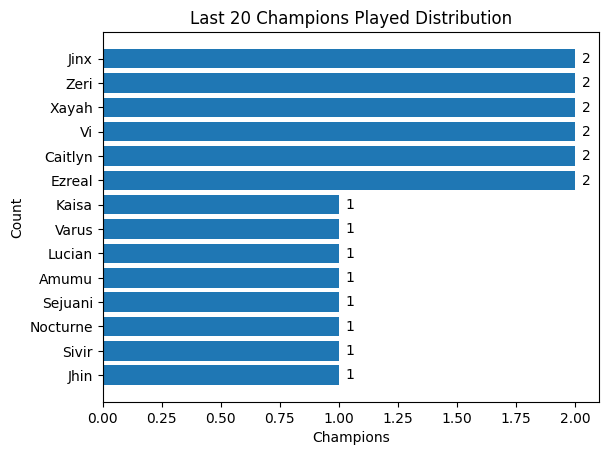

In [40]:
champ_counts = summoner_df['champ_name'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()
bars = ax.barh(champ_counts.index, champ_counts.values)

ax.bar_label(bars, padding=5)

# plt.barh(champ_counts.index, champ_counts.values)
plt.title('Last 20 Champions Played Distribution')
plt.xlabel('Champions')
plt.ylabel('Count')
plt.show()



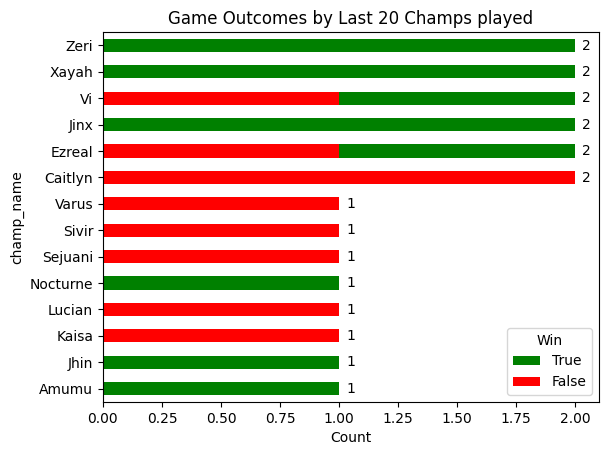

In [41]:
# Group by gender and win, and count the number of occurrences
grouped = summoner_df.groupby(['champ_name', 'win']).size().unstack()

# sort by the total count of each row
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=True).index]

# Plot horizontal bar chart
fig, ax = plt.subplots()
grouped.plot(kind='barh', stacked=True, ax=ax, color=['red', 'green'])
ax.set_xlabel('Count')
ax.set_title('Game Outcomes by Last 20 Champs played')
ax.bar_label(bars, padding=5)

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Win', loc='lower right')

plt.show()

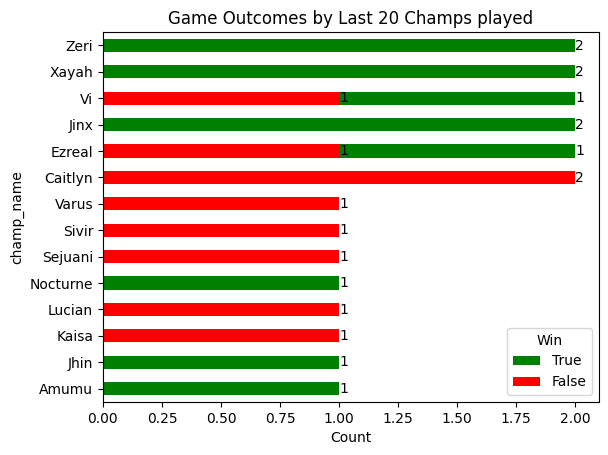

In [19]:
# Group by gender and win, and count the number of occurrences
grouped = summoner_df.groupby(['champ_name', 'win']).size().unstack()

# sort by the total count of each row
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=True).index]

grouped.fillna(0, inplace=True)

# Plot horizontal bar chart
fig, ax = plt.subplots()
bars = grouped.plot(kind='barh', stacked=True, ax=ax, color=['red', 'green'])
ax.set_xlabel('Count')
ax.set_title('Game Outcomes by Last 20 Champs played')

# Add value labels to each bar
for i, bar in enumerate(bars.containers):
    total_width = 0
    for rect in bar:
        width = int(rect.get_width())
        if width > 0:
            ax.text(rect.get_x() + rect.get_width(), rect.get_y() + rect.get_height()/2,
                    f'{width:,}', ha='left', va='center')
        total_width += width

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Win', loc='lower right')

plt.show()
